# Here is a simpler process

In [1]:
from platform import python_version
import autokeras as ak
import datetime as dt
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.metrics import f1_score
print(python_version())
import scipy
print('scipy:'+scipy.__version__)
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.metrics import log_loss
import time

3.7.4
scipy:1.7.3


In [2]:
import os

os.getcwd()

'C:\\Users\\shaun'

# Read the file

In [3]:
datapath = r"C:\Users\shaun\OneDrive\Desktop\Feature_Engineering_Project\diabetes.csv"
#datapath = './'
#filename = 'ionosphere.csv'
df = pd.read_csv(datapath)
print(df.shape)
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
target = 'Target'

In [5]:
#Extract list of numeric columns
cols = df.select_dtypes([np.number]).columns
cols = list(cols)
cols.remove('Target')

<AxesSubplot:>

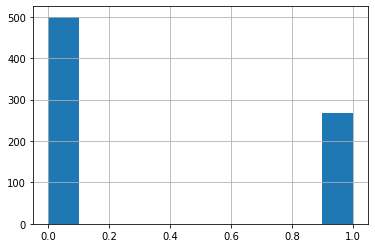

In [6]:
df[target].hist()

In [7]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df[target] = lb_make.fit_transform(df[target])
df[[target]].head(1)

,Target
0,1


# Import each tool you are evaluating here

Importing PyImpetus, Eli5, EvolutionaryFS, autofeat ; To Include More from https://www.opensourceagenda.com/tags/feature-selection?page=2

In [8]:
from PyImpetus import PPIMBC
#import eli5
#from eli5.sklearn import PermutationImportance
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from EvolutionaryFS import GeneticAlgorithmFS
from zoofs import ParticleSwarmOptimization

import featurewiz as fwiz
from featurewiz import FeatureWiz

from autofeat import FeatureSelector

#from autofeat import AutoFeatRegressor

Imported DASK version = 0.0.90. nrows=None uses all rows. Set nrows=1000 to randomly sample fewer rows.
output = featurewiz(dataname, target, corr_limit=0.70, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']
                                


# Define the dataset and target here

In [9]:
preds = [x for x in list(df) if x not in [target]]
len(preds)

8

In [10]:
X = df[preds]
y = df[target]
print(X.shape, y.shape)

(768, 8) (768,)


In [11]:
##get train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1,
                                                    stratify=y)
print(X_train.shape, X_test.shape)

(614, 8) (154, 8)


In [12]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
678,3,121,52,0,0,36.0,0.127,25
53,8,176,90,34,300,33.7,0.467,58
665,1,112,80,45,132,34.8,0.217,24
219,5,112,66,0,0,37.8,0.261,41
720,4,83,86,19,0,29.3,0.317,34
...,...,...,...,...,...,...,...,...
88,15,136,70,32,110,37.1,0.153,43
137,0,93,60,25,92,28.7,0.532,22
645,2,157,74,35,440,39.4,0.134,30
308,0,128,68,19,180,30.5,1.391,25


In [13]:
#Find categorical columns and object columns to transform into numeric: 
cat_columns = list(X.select_dtypes(['category']).columns)
obj_columns = list(X.select_dtypes(['object']).columns)
len(cat_columns), len(obj_columns)

(0, 0)

In [14]:
#Category+Object Transforms -> You must always fit_transform train while only doing transform for test
if len(cat_columns+obj_columns):
    for each_cat in cat_columns+obj_columns:
        LB = LabelEncoder()
        X_train[each_cat] = LB.fit_transform(X_train[each_cat])
        X_test[each_cat] = LB.transform(X_test[each_cat])
        print(each_cat+' completed transform')

In [15]:
#MinMax Scale Features -> You must always fit_transform train while only doing transform for test
for each_col in cols:
    scaler = MinMaxScaler(feature_range = (1,100))
    X_train[each_col] = scaler.fit_transform(X_train[each_col].values.reshape(-1,1))
    X_test[each_col] = scaler.transform(X_test[each_col].values.reshape(-1,1))
print('completed Min Max Scaling')

completed Min Max Scaling


In [16]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
678,18.470588,61.195980,47.8,1.0,1.000000,54.114754,2.822346,7.60
53,47.588235,88.557789,82.0,35.0,44.676471,50.721311,17.231592,62.05
665,6.823529,56.718593,73.0,46.0,20.217647,52.344262,6.636558,5.95
219,30.117647,56.718593,60.4,1.0,1.000000,56.770492,8.501284,34.00
720,24.294118,42.291457,78.4,20.0,1.000000,44.229508,10.874572,22.45


### Since The Tool is not allowed to look at test data, you must only use X_train and y_train for the Tool

In [17]:
train = pd.concat([X_train,y_train],axis=1)
print(train.shape)

(614, 9)


In [18]:
test = pd.concat([X_test,y_test],axis=1)
print(test.shape)

(154, 9)


In [19]:
time_to_fit = pd.DataFrame(columns=['Feature_Engineering_Technique','Start_Time','End_Time','Time_to_fit'])
time_to_fit.head()

,Feature_Engineering_Technique,Start_Time,End_Time,Time_to_fit


############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
Loading train data...
    Shape of your Data Set loaded: (614, 9)
    Caution: We will try to reduce the memory usage of dataframe from 0.05 MB
    Memory usage after optimization is: 0.01 MB
        decreased by 68.8%
     Loaded. Shape = (614, 9)
No test data filename given...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    8 Predictors classified...
        No variables removed since no ID or low-information variab

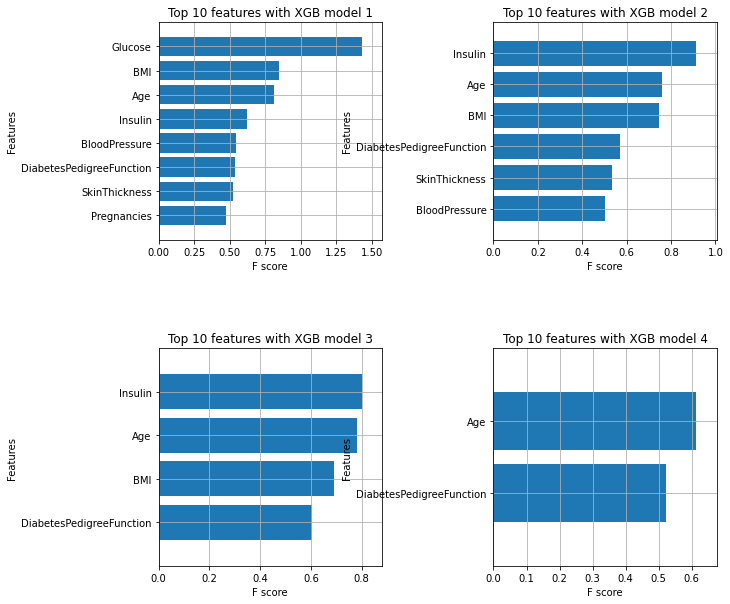

            Total time taken for XGBoost feature selection = 1 seconds
    ID variables are always selected so that rows can be identified. But they are not important!
Selected 8 important features:
['Glucose', 'BMI', 'Age', 'Insulin', 'BloodPressure', 'DiabetesPedigreeFunction', 'SkinThickness', 'Pregnancies']
    Time taken = 1 seconds
Returning list of 8 important features and dataframe.
    Time taken to create entire pipeline = 1 second(s)


,Feature_Engineering_Technique,Start_Time,End_Time,Time_to_fit
0,FeatureWiz,1.643555e+09,1.643555e+09,0.770684


In [20]:
###################################################FeatureWiz#############################################################
### Now run it through featurewiz - remember featurewiz does not look at test data only modifies for numeric
start_featurewiz = time.time()

features = FeatureWiz(corr_limit=0.70, verbose=2, sep=',', header=0, feature_engg='', category_encoders='',dask_xgboost_flag=False, nrows=None)
X_train_selected = features.fit_transform(X_train,y_train)
end_featurewiz = time.time()
diff = end_featurewiz - start_featurewiz
best_columns_featurewiz = features.features
len(best_columns_featurewiz)
time_to_fit = time_to_fit.append({'Feature_Engineering_Technique':'FeatureWiz','Start_Time':start_featurewiz,'End_Time':end_featurewiz,'Time_to_fit':diff} , ignore_index=True)
time_to_fit.head()

In [21]:
#################Autofeat#########################

start_autofeat = time.time()
fsel = FeatureSelector(verbose=1)
new_X = fsel.fit_transform(X_train, y_train)
end_autofeat = time.time()
diff = end_autofeat - start_autofeat
best_columns_autofeat = list(new_X.columns)
time_to_fit = time_to_fit.append({'Feature_Engineering_Technique':'Autofeat','Start_Time':start_autofeat,'End_Time':end_autofeat,'Time_to_fit':diff} , ignore_index=True)
time_to_fit.head()

[featsel] Scaling data...done.
[featsel] Feature selection run 1/5
[featsel] Feature selection run 2/5
[featsel] Feature selection run 3/5
[featsel] Feature selection run 4/5
[featsel] Feature selection run 5/5
[featsel] 6 features after 5 feature selection runs
[featsel] 6 features after correlation filtering
[featsel] 6 features after noise filtering


,Feature_Engineering_Technique,Start_Time,End_Time,Time_to_fit
0,FeatureWiz,1.643555e+09,1.643555e+09,0.770684
1,Autofeat,1.643555e+09,1.643555e+09,0.591444


In [22]:
##############FeatureEngine############
from sklearn.pipeline import Pipeline
from feature_engine.selection import (
    DropDuplicateFeatures,
    DropConstantFeatures,
    DropDuplicateFeatures,
    DropCorrelatedFeatures,
    SmartCorrelatedSelection,
    SelectByShuffling,
    SelectBySingleFeaturePerformance,
    RecursiveFeatureElimination,
)

pipe = Pipeline([
    ('constant', DropConstantFeatures(tol=0.998)), # drops constand and quasi-constant altogether
    ('duplicated', DropDuplicateFeatures()), # drops duplicates
    ('correlation', SmartCorrelatedSelection( # drops correlated
        threshold=0.8,
        selection_method="model_performance",
        estimator=RandomForestClassifier(n_estimators=10, random_state=1),
    )),
])

# find features to remove

start_fe = time.time()
pipe.fit(X_train, y_train)
end_fe = time.time()

diff = end_fe - start_fe

print('Number of original variables: ', X_train.shape[1])

X_train_fe = pipe.transform(X_train)

print('Number of variables after selection: ', X_train_fe.shape[1])

best_columns_fe = list(X_train_fe.columns)
time_to_fit = time_to_fit.append({'Feature_Engineering_Technique':'FeatureEngine','Start_Time':start_fe,'End_Time':end_fe,'Time_to_fit':diff} , ignore_index=True)
time_to_fit.head()

Number of original variables:  8
Number of variables after selection:  8


,Feature_Engineering_Technique,Start_Time,End_Time,Time_to_fit
0,FeatureWiz,1.643555e+09,1.643555e+09,0.770684
1,Autofeat,1.643555e+09,1.643555e+09,0.591444
2,FeatureEngine,1.643555e+09,1.643555e+09,0.008044


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   8 | elapsed:    5.0s remaining:    8.4s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    5.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    5.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parall

Feature importance:  [13.862943611198906, 13.862943611198906, 11.917033462143593, 11.223886281583647, 10.918504632032466, 4.318419333119523]


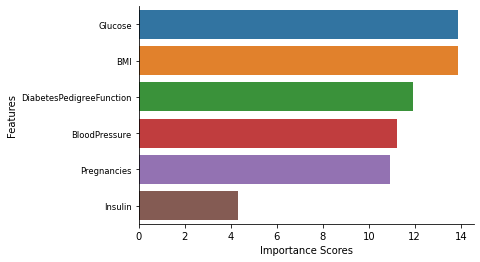

,Feature_Engineering_Technique,Start_Time,End_Time,Time_to_fit
0,FeatureWiz,1.643555e+09,1.643555e+09,0.770684
1,Autofeat,1.643555e+09,1.643555e+09,0.591444
2,FeatureEngine,1.643555e+09,1.643555e+09,0.008044
3,PyImpetus,1.643555e+09,1.643555e+09,5.804262


In [23]:
####################################################PyImpetus#####################################################
start_pyimpetus = time.time()
model = PPIMBC(LogisticRegression(random_state=27, max_iter=1000, class_weight="balanced"), cv=0, num_simul=20, simul_type=0, simul_size=0.2, sig_test_type="non-parametric", random_state=27, verbose=2, p_val_thresh=0.05)
# Fit this above object on the train part and transform the train dataset into selected feature subset
# NOTE: x_train has to be a dataframe and y_train has to be a numpy array
x_train = model.fit_transform(X_train, y_train.values)
# Transform the test set as well
# Check out the scores of each feature. The scores are in order of the selected feature list
# NOTE: You can use these scores ina feature selection ensemble
print("Feature importance: ", model.feat_imp_scores)
# Plot the feature importance scores
model.feature_importance()
best_columns_pyimpetus = list(x_train.columns)
end_pyimpetus = time.time()
diff = end_pyimpetus - start_pyimpetus
len(x_train.columns)
# Convert the data into numpy arrays
#x_train, x_test = x_train.values, x_test.values
time_to_fit = time_to_fit.append({'Feature_Engineering_Technique':'PyImpetus','Start_Time':start_pyimpetus,'End_Time':end_pyimpetus,'Time_to_fit':diff} , ignore_index=True)
time_to_fit.head()

#######################################################Eli5##############################################################

sel = SelectFromModel(
    PermutationImportance(SVC(), cv=5),
    threshold=0.05,
).fit(X_train, y_train)
x_train = sel.transform(X_train)
best_columns_eli5 = x_train.columns

TypeError: check_cv() takes from 0 to 2 positional arguments but 3 were given

Time To Generate Features 

In [24]:
time_to_fit.head()

,Feature_Engineering_Technique,Start_Time,End_Time,Time_to_fit
0,FeatureWiz,1.643555e+09,1.643555e+09,0.770684
1,Autofeat,1.643555e+09,1.643555e+09,0.591444
2,FeatureEngine,1.643555e+09,1.643555e+09,0.008044
3,PyImpetus,1.643555e+09,1.643555e+09,5.804262


In [25]:
#############################################EvolutionaryFS#############################################
##get train and test data
data_dict={0:{'x_train':X_train,'y_train':y_train,'x_test':X_test,'y_test':y_test}}
columns_list=list(X.columns)

start_evolutionaryfs = time.time()
model_object=LogisticRegression(n_jobs=-1,random_state=1)
evoObj=GeneticAlgorithmFS(model=model_object,data_dict=data_dict,cost_function=f1_score,average='micro',cost_function_improvement='increase',columns_list=columns_list,generations=20,population=30,prob_crossover=0.9,prob_mutation=0.1,run_time=60000)
best_columns_EvolutionaryFS=evoObj.GetBestFeatures()
end_evolutionaryfs = time.time()
diff = end_evolutionaryfs - start_evolutionaryfs
len(best_columns_EvolutionaryFS)
time_to_fit = time_to_fit.append({'Feature_Engineering_Technique':'EvolutionaryFS','Start_Time':start_evolutionaryfs,'End_Time':end_evolutionaryfs,'Time_to_fit': diff} , ignore_index=True)
time_to_fit.head()

================= Best performance for generation 0 : 0.7857142857142857 =================
================= Best performance for generation 1 : 0.7727272727272727 =================
================= Best performance for generation 2 : 0.7922077922077922 =================
================= Best performance for generation 3 : 0.7922077922077922 =================
================= Best performance for generation 4 : 0.7922077922077922 =================
================= Best performance for generation 5 : 0.7922077922077922 =================
================= Best performance for generation 6 : 0.7922077922077922 =================
================= Best performance for generation 7 : 0.7922077922077922 =================
================= Best performance for generation 8 : 0.7922077922077922 =================
================= Best performance for generation 9 : 0.7922077922077922 =================
================= Best performance for generation 10 : 0.7922077922077922 ================

,Feature_Engineering_Technique,Start_Time,End_Time,Time_to_fit
0,FeatureWiz,1.643555e+09,1.643555e+09,0.770684
1,Autofeat,1.643555e+09,1.643555e+09,0.591444
2,FeatureEngine,1.643555e+09,1.643555e+09,0.008044
3,PyImpetus,1.643555e+09,1.643555e+09,5.804262
4,EvolutionaryFS,1.643555e+09,1.643555e+09,32.048839


In [26]:
#########################################################Zoof##############################################
# define your own objective function, make sure the function receives four parameters,
#  fit your model and return the objective value ! 
def objective_function_topass(model,X_train, y_train, X_test, y_test):      
    model.fit(X_train,y_train)  
    P=log_loss(y_test,model.predict_proba(X_test))
    return P
    
# create object of algorithm
algo_object=ParticleSwarmOptimization(objective_function_topass,n_iteration=25,
                                       population_size=20,minimize=True)
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier()                                       
# fit the algorithm
start_zoof = time.time()

best_columns_zoof = algo_object.fit(lgb_model,X_train, y_train, X_train, y_train,verbose=True)

end_zoof = time.time()
diff = end_evolutionaryfs - start_evolutionaryfs

time_to_fit = time_to_fit.append({'Feature_Engineering_Technique':'Zoof','Start_Time':start_zoof,'End_Time':end_zoof,'Time_to_fit': diff} , ignore_index=True)

		 Best value of metric across iteration 	 Best value of metric across population  
Iteration 0 	 0.06522256179810776 					 0.06522256179810776 
Iteration 1 	 0.0702745431782473 					 0.06522256179810776 
Iteration 2 	 0.06183914293837399 					 0.06183914293837399 
Iteration 3 	 0.060148340657244 					 0.060148340657244 
Iteration 4 	 0.05635106264629723 					 0.05635106264629723 
Iteration 5 	 0.05635106264629723 					 0.05635106264629723 
Iteration 6 	 0.05635106264629723 					 0.05635106264629723 
Iteration 7 	 0.05635106264629723 					 0.05635106264629723 
Iteration 8 	 0.05635106264629723 					 0.05635106264629723 
Iteration 9 	 0.05635106264629723 					 0.05635106264629723 
Iteration 10 	 0.05635106264629723 					 0.05635106264629723 
Iteration 11 	 0.05635106264629723 					 0.05635106264629723 
Iteration 12 	 0.05635106264629723 					 0.05635106264629723 
Iteration 13 	 0.05635106264629723 					 0.05635106264629723 
Iteration 14 	 0.05635106264629723 					 0.05635106264629723 
I

In [27]:
###############################Sklearn Genetic Opt##########################################################

import matplotlib.pyplot as plt
from sklearn_genetic import GAFeatureSelectionCV
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import numpy as np

clf = SVC(gamma='auto')

evolved_estimator = GAFeatureSelectionCV(
    estimator=clf,
    scoring="balanced_accuracy",
    population_size=30,
    generations=20,
    n_jobs=-1)

start_gopt = time.time()
# Train and select the features
evolved_estimator.fit(X_train, y_train)
end_gopt = time.time()

diff = end_gopt-start_gopt

# Features selected by the algorithm
best_columns_genetic_opt = list(evolved_estimator.best_features_)
best_columns_genetic_opt = X_train.columns[best_columns_genetic_opt]

time_to_fit = time_to_fit.append({'Feature_Engineering_Technique':'Genetic OPT','Start_Time':start_gopt,'End_Time':end_gopt,'Time_to_fit': diff} , ignore_index=True)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	30    	0.506914	0.0158702  	0.551503   	0.491913   
1  	60    	0.525191	0.0218653  	0.579922   	0.5        
2  	60    	0.544353	0.0171517  	0.579922   	0.510437   
3  	60    	0.552591	0.0140134  	0.579922   	0.536332   
4  	60    	0.558439	0.0121656  	0.579922   	0.537333   
5  	60    	0.563889	0.00975283 	0.579922   	0.551503   
6  	60    	0.571698	0.00778921 	0.579922   	0.558026   
7  	60    	0.577923	0.00509506 	0.579922   	0.564933   
8  	60    	0.579922	2.22045e-16	0.579922   	0.579922   
9  	60    	0.579922	2.22045e-16	0.579922   	0.579922   
10 	60    	0.579922	2.22045e-16	0.579922   	0.579922   
11 	60    	0.579922	2.22045e-16	0.579922   	0.579922   
12 	60    	0.579922	2.22045e-16	0.579922   	0.579922   
13 	60    	0.579922	2.22045e-16	0.579922   	0.579922   
14 	60    	0.579922	2.22045e-16	0.579922   	0.579922   
15 	60    	0.579922	2.22045e-16	0.579922   	0.579922   
16 	60    	0.579922	2.22045e-16	0.579922   	0.57

In [28]:
##################BorutaPy###################
from boruta import BorutaPy

# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

start_bpy = time.time()
feat_selector.fit(X_train.values, y_train)
end_bpy = time.time()

diff = end_bpy-start_bpy

# check selected features - first 5 features are selected
feat_selector.support_

# check ranking of features
feat_selector.ranking_

best_columns_borutapy = list(X_train.loc[:,feat_selector.support_].columns)

time_to_fit = time_to_fit.append({'Feature_Engineering_Technique':'BorutaPy','Start_Time':start_bpy,'End_Time':end_bpy,'Time_to_fit': diff} , ignore_index=True)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	8
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	6
Tentative: 	2
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	6
Tentative: 	2
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	6
Tentative: 	2
Rejected: 	0
Iteration: 	11 / 100
Confirmed: 	6
Tentative: 	2
Rejected: 	0
Iteration: 	12 / 100
Confirmed: 	6
Tentative: 	0
Rejected: 	2


BorutaPy finished running.

Iteration: 	13 / 100
Confirmed: 	6
Tentative: 	0
Rejected: 	2


In [29]:
#################BorutaShap##################

from BorutaShap import BorutaShap

# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
Feature_Selector = BorutaShap(importance_measure='shap',
                              classification=False)

start_bshap = time.time()
Feature_Selector.fit(X=X_train, y=y_train, n_trials=100, sample=False,train_or_test = 'test', normalize=True,verbose=True)
end_bshap = time.time()

diff = end_bshap-start_bshap

# check selected features - first 5 features are selected
subset = Feature_Selector.Subset()

best_columns_borutashap = list(subset.columns)

time_to_fit = time_to_fit.append({'Feature_Engineering_Technique':'BorutaShap','Start_Time':start_bshap,'End_Time':end_bshap,'Time_to_fit': diff} , ignore_index=True)

  0%|          | 0/100 [00:00<?, ?it/s]

4 attributes confirmed important: ['Age', 'BMI', 'DiabetesPedigreeFunction', 'Glucose']
4 attributes confirmed unimportant: ['Insulin', 'SkinThickness', 'Pregnancies', 'BloodPressure']
0 tentative attributes remains: []


In [30]:
#Create a dictionary of lists with feature engineering technique
fs = {"FeatureWiz":best_columns_featurewiz,"Autofeat":best_columns_autofeat,"FeatureEngine":best_columns_fe,"PyImpetus":best_columns_pyimpetus,"EvolutionaryFS":best_columns_EvolutionaryFS,"Zoof":best_columns_zoof, "Genetic OPT":best_columns_genetic_opt, "BorutaPy":best_columns_borutapy, "BorutaShap":best_columns_borutashap}
#fs

# Here is an even simpler way to do multi fold cross validation
## First set a baseline performance by including all features in model
## Then compare that model to feature selection by EvolutionaryFS

## The baseline model with all features yields a balanced accuracy score of 91.88%

In [31]:
## You must set the randomstate for cross validation. Otherwise, scores will be totally random each time.
from sklearn.model_selection import StratifiedKFold, KFold
cv = StratifiedKFold(n_splits=5,shuffle=True, random_state=99)
#cv = KFold(n_splits=5,shuffle=False, random_state=99) ## Use this for Regression

# We have to do the same transforms for X and y 

In [32]:
#Category+Object Transforms -> You must always fit_transform train while only doing transform for test
if len(cat_columns+obj_columns):
    for each_cat in cat_columns+obj_columns:
        LB = LabelEncoder()
        X[each_cat] = LB.fit_transform(X[each_cat])
        print(each_cat+' completed X transform')
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [33]:
#MinMax Scale Features -> You must always fit_transform train while only doing transform for test
for each_col in cols:
    scaler = MinMaxScaler(feature_range = (1,100))
    X[each_col] = scaler.fit_transform(X[each_col].values.reshape(-1,1))
print('completed Min Max Scaling for X')

completed Min Max Scaling for X


# Using all features in dataset, this is the baseline score

In [34]:
model1 = RandomForestClassifier(n_estimators=300, random_state=99)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=model1, X=X, y=y, scoring='balanced_accuracy', cv=cv)
print(scores)
print('Mean Score for all features = %s' %scores.mean())

[0.73833333 0.74703704 0.70574074 0.67471698 0.73518868]
Mean Score for all features = 0.720203354297694


##  Here we run Cross Validation and get accuracy metrics for each technique

In [35]:
performance = pd.DataFrame(columns=['Start_Time','End_Time','Run_Time','Accuracy_Score','Model','Feature_Engineering_Technique'])
cv = StratifiedKFold(n_splits=5,shuffle=True, random_state=99)
for key,value in fs.items():
    start = time.time()
    model2 = RandomForestClassifier(n_estimators=300, random_state=99)
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(estimator=model2, X=X_train[value], y=y_train, scoring='balanced_accuracy', cv=cv, n_jobs=-1)
    end = time.time()
    diff = (end-start)
    print(scores)
    print('Mean Score for %s = %s' %(key, scores.mean()))
    performance = performance.append({'Start_Time':start,'End_Time':end,'Run_Time':diff,'Accuracy_Score':scores.mean(),'Model':'RandomForest','Feature_Engineering_Technique':key} , ignore_index=True)
    time_to_fit.loc[(time_to_fit['Feature_Engineering_Technique']==key), 'Mean_CV_Accuracy'] = scores.mean()
time_to_fit.head()

[0.70406977 0.7693314  0.72107558 0.79796512 0.72321429]
Mean Score for FeatureWiz = 0.7431312292358804
[0.7380814  0.76395349 0.7443314  0.78546512 0.69375   ]
Mean Score for Autofeat = 0.7451162790697674
[0.70406977 0.7755814  0.71482558 0.7747093  0.68690476]
Mean Score for FeatureEngine = 0.7312181616832779
[0.67369186 0.78633721 0.67456395 0.74520349 0.70565476]
Mean Score for PyImpetus = 0.7170902547065338
[0.70319767 0.75770349 0.72107558 0.7568314  0.69375   ]
Mean Score for EvolutionaryFS = 0.7265116279069768
[0.70406977 0.7755814  0.71482558 0.7747093  0.68690476]
Mean Score for Zoof = 0.7312181616832779
[0.62892442 0.65043605 0.65218023 0.70770349 0.66994048]
Mean Score for Genetic OPT = 0.6618369324473976
[0.72732558 0.76395349 0.76758721 0.7568314  0.69315476]
Mean Score for BorutaPy = 0.7417704872646734
[0.70319767 0.72732558 0.72732558 0.75770349 0.68125   ]
Mean Score for BorutaShap = 0.719360465116279


,Feature_Engineering_Technique,Start_Time,End_Time,Time_to_fit,Mean_CV_Accuracy
0,FeatureWiz,1.643555e+09,1.643555e+09,0.770684,0.743131
1,Autofeat,1.643555e+09,1.643555e+09,0.591444,0.745116
2,FeatureEngine,1.643555e+09,1.643555e+09,0.008044,0.731218
3,PyImpetus,1.643555e+09,1.643555e+09,5.804262,0.717090
4,EvolutionaryFS,1.643555e+09,1.643555e+09,32.048839,0.726512


## You must finally train a model on X_train and test it on X_test using selected features

In [36]:
#Using Lime to interpret the results of model
#from lime import lime_text
from sklearn.pipeline import make_pipeline
from sklearn.metrics import balanced_accuracy_score, mean_squared_error
#import lime.lime_tabular

for key,value in fs.items():
    model3 = RandomForestClassifier(n_estimators=300, random_state=99)
    from sklearn.metrics import classification_report
    model3.fit(X_train[value], y_train)
    print(classification_report(y_test, model3.predict(X_test[value])))
    score_val = balanced_accuracy_score(y_test, model3.predict(X_test[value]))
    time_to_fit.loc[(time_to_fit['Feature_Engineering_Technique']==key), 'Mean_Test_Accuracy'] = score_val
    #print("Lime Feature Importance : "+key)
    #explainer = lime.lime_tabular.LimeTabularExplainer(X_train[value].values, feature_names=X_train[value].columns, class_names=[0, 1], mode='classification')
    #exp = explainer.explain_instance(X_test[value].values[1], model3.predict_proba, num_features=len(X_train[value].columns))
    #exp.show_in_notebook(show_table=True, show_all=False)

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       100
           1       0.68      0.52      0.59        54

    accuracy                           0.75       154
   macro avg       0.73      0.69      0.70       154
weighted avg       0.74      0.75      0.74       154

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       100
           1       0.63      0.54      0.58        54

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.69       154
weighted avg       0.72      0.73      0.72       154

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       100
           1       0.69      0.54      0.60        54

    accuracy                           0.75       154
   macro avg       0.73      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154

              preci

In [37]:
time_to_fit['Dataset'] = "Diabetes"
time_to_fit['Type'] = "Binary Classification"
time_to_fit['Metric'] = "balanced accuracy"

In [38]:
time_to_fit

,Feature_Engineering_Technique,Start_Time,End_Time,Time_to_fit,Mean_CV_Accuracy,Mean_Test_Accuracy,Dataset,Type,Metric
0,FeatureWiz,1.643555e+09,1.643555e+09,0.770684,0.743131,0.694259,Diabetes,Binary Classification,balanced accuracy
1,Autofeat,1.643555e+09,1.643555e+09,0.591444,0.745116,0.683519,Diabetes,Binary Classification,balanced accuracy
2,FeatureEngine,1.643555e+09,1.643555e+09,0.008044,0.731218,0.703519,Diabetes,Binary Classification,balanced accuracy
3,PyImpetus,1.643555e+09,1.643555e+09,5.804262,0.717090,0.675741,Diabetes,Binary Classification,balanced accuracy
4,EvolutionaryFS,1.643555e+09,1.643555e+09,32.048839,0.726512,0.693519,Diabetes,Binary Classification,balanced accuracy
5,Zoof,1.643555e+09,1.643555e+09,32.048839,0.731218,0.703519,Diabetes,Binary Classification,balanced accuracy
6,Genetic OPT,1.643555e+09,1.643555e+09,50.406841,0.661837,0.625000,Diabetes,Binary Classification,balanced accuracy
7,BorutaPy,1.643555e+09,1.643555e+09,3.089959,0.741770,0.709259,Diabetes,Binary Classification,balanced accuracy
8,BorutaShap,1.643555e+09,1.643556e+09,72.470936,0.719360,0.679259,Diabetes,Binary Classification,balanced accuracy


# This is another way to know how well feature selection works

notes : Class imbalance - PyImpetus